# **Graded Challenge 1**
### **HACTIV8 Full Time Data Science Phase 1**

# **1. Perkenalan** 

## **1.1 Identitas**

> Nama  : Ropiudin

> Batch : FTDS OO2-HCK

> Graded Challenge : Graded Challenge 1 

## **1.2 Objective**

> Pada Graded Challenge ini dataset yang digunakan adalah dataset **Uber and Lyft Dataset Boston, MA** yang merupakan dataset platform ride-hailing dimana pada dataset ini terdapat 57 kolom dan 693071 baris. Dataset yang digunakan pada Graded Challenge ini dapat diakses di [link](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)

> Dan pada Graded Challenge ini, akan membuat model Machine Learning yaitu model Regression dengan menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing

# **2. Import Libraries** 

In [162]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import  MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings(action='ignore')

> Code di atas merupakan daftar libs yang digunakan pada analisis 

# **3. Data Loading** 

In [164]:
df = pd.read_csv('rideshare_kaggle.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.precision", 0)
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.890,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.000,0.440,1.000,42.215,-71.033,42.340,37.120,Mostly Cloudy,Rain throughout the day.,0.000,0.000,0.680,8.660,9.170,1545015600,10.000,43.680,1544968800,34.190,1545048000,37.950,1544968800,27.390,1545044400,partly-cloudy-night,32.700,1021.980,57,0.720,0,10.000,303.800,1544962084,1544994864,0.300,0.128,1544979600,39.890,1545012000,43.680,1544968800,33.730,1545012000,38.070,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.677,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.000,0.440,1.000,42.215,-71.033,43.580,37.350,Rain,"Rain until morning, starting again in the eve...",0.130,1.000,0.940,11.980,11.980,1543291200,4.786,47.300,1543251600,42.100,1543298400,43.920,1543251600,36.200,1543291200,rain,41.830,1003.970,90,1.000,0,4.786,291.100,1543232969,1543266992,0.640,0.130,1543251600,40.490,1543233600,47.300,1543251600,36.200,1543291200,43.920,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.198,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.000,0.440,1.000,42.215,-71.033,38.330,32.930,Clear,Light rain in the morning.,0.000,0.000,0.750,7.330,7.330,1543334400,10.000,47.550,1543320000,33.100,1543402800,44.120,1543320000,29.110,1543392000,clear-night,31.100,992.280,240,0.030,0,10.000,315.700,1543319437,1543353364,0.680,0.106,1543338000,35.360,1543377600,47.550,1543320000,31.040,1543377600,44.120,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.749,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.000,0.440,1.000,42.215,-71.033,34.380,29.630,Clear,Partly cloudy throughout the day.,0.000,0.000,0.730,5.280,5.280,1543514400,10.000,45.030,1543510800,28.900,1543579200,38.530,1543510800,26.200,1543575600,clear-night,26.640,1013.730,310,0.000,0,10.000,291.100,1543492370,1543526114,0.750,0.000,1543507200,34.670,1543550400,45.030,1543510800,30.300,1543550400,38.530,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.223,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.000,0.440,1.000,42.215,-71.033,37.440,30.880,Partly Cloudy,Mostly cloudy throughout the day.,0.000,0.000,0.700,9.140,9.140,1543446000,10.000,42.180,1543420800,36.710,1543478400,35.750,1543420800,30.290,1543460400,partly-cloudy-night,28.610,998.360,303,0.440,0,10.000,347.700,1543405904,1543439738,0.720,0.000,1543420800,33.100,1543402800,42.180,1543420800,29.110,1543392000,35.750,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1543708386.000,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.000,1.000,1.000,42.352,-71.064,37.050,37.050,Partly Cloudy,Light rain in the morning and overnight.,0.000,0.000,0.740,2.340,2.870,1543672800,9.785,44

In [165]:
df.head().T

,0,1,2,3,4
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a
timestamp,1544952607.890,1543284023.677,1543366822.198,1543553582.749,1543463360.223
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [167]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [168]:
df.isnull().mean()

id                            0.000
timestamp                     0.000
hour                          0.000
day                           0.000
month                         0.000
datetime                      0.000
timezone                      0.000
source                        0.000
destination                   0.000
cab_type                      0.000
product_id                    0.000
name                          0.000
price                         0.079
distance                      0.000
surge_multiplier              0.000
latitude                      0.000
longitude                     0.000
temperature                   0.000
apparentTemperature           0.000
short_summary                 0.000
long_summary                  0.000
precipIntensity               0.000
precipProbability             0.000
humidity                      0.000
windSpeed                     0.000
windGust                      0.000
windGustTime                  0.000
visibility                  

In [169]:
df[df.duplicated()].shape

(0, 57)

In [170]:
num_col = df.describe().columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

In [171]:
# numeric overview
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.000,1544045709.755,689192.493,1543203646.000,1543443968.000,1543737478.000,1544827509.000,1545160511.000
hour,693071.000,11.619,6.948,0.000,6.000,12.000,18.000,23.000
day,693071.000,17.794,9.982,1.000,13.000,17.000,28.000,30.000
month,693071.000,11.587,0.492,11.000,11.000,12.000,12.000,12.000
price,637976.000,16.545,9.324,2.500,9.000,13.500,22.500,97.500
distance,693071.000,2.189,1.139,0.020,1.280,2.160,2.920,7.860
surge_multiplier,693071.000,1.014,0.092,1.000,1.000,1.000,1.000,3.000
latitude,693071.000,42.338,0.048,42.215,42.350,42.352,42.365,42.366
longitude,693071.000,-71.066,0.020,-71.105,-71.081,-71.063,-71.054,-71.033
temperature,693071.000,39.584,6.726,18.910,36.450,40.490,43.580,57.220


In [172]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

id

424553bb-7174-41ea-aeb4-fe06d4f4b9d7    1
86557077-556d-4cc0-8acf-4d618d5c0a8d    1
fa75d4b4-52c8-4e65-a5e6-335c8268c968    1
2d051bf0-4e5e-4b18-a931-ea15c4fb9066    1
7339fbe3-b0bb-4bac-a037-b1dc2ab0feac    1
                                       ..
0281be2d-1573-47a5-868d-fef6100d1b77    1
33827bd1-5164-4579-b567-14e85220c99b    1
6c736bfe-40d0-47b9-be59-ef41d9df516b    1
7311da4b-0932-4572-97ee-242a9e5f0229    1
e7fdc087-fe86-40a5-a3c3-3b2a8badcbda    1
Name: id, Length: 693071, dtype: int64
----------
datetime

2018-11-26 23:21:14    156
2018-11-29 01:02:08    156
2018-11-26 23:33:14    156
2018-11-28 15:56:08    156
2018-11-28 14:29:08    156
                      ... 
2018-12-01 14:18:01      6
2018-12-16 12:55:06      4
2018-11-28 09:32:17      3
2018-12-13 15:10:13      1
2018-11-30 13:17:58      1
Name: datetime, Length: 31350, dtype: int64
----------
timezone

America/New_York    693071
Name: timezone, dtype: int64
----------
source

Financial District         58857
Thea

> Pada bagian data loading, diperoleh informasi bahwa banyaknya row pada dataset adalah sebanyak 693071 row dan 57 kolom

> terdapat missing value pada kolom data price sebanyak 55095 atau sebesar 7.9% yang nantinya missing value ini akan di drop

> pada dataset tidak terdapat data yang duplikat, dan pada dataset pula diketahui bahwa terdapat 46 kolom bertipe data numerik dan 11 kolom bertipe katekorik

# **4. Data Cleaning** 

In [173]:
df_clean = df.copy()
df_clean.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.890,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.000,0.440,1.000,42.215,-71.033,42.340,37.120,Mostly Cloudy,Rain throughout the day.,0.000,0.000,0.680,8.660,9.170,1545015600,10.000,43.680,1544968800,34.190,1545048000,37.950,1544968800,27.390,1545044400,partly-cloudy-night,32.700,1021.980,57,0.720,0,10.000,303.800,1544962084,1544994864,0.300,0.128,1544979600,39.890,1545012000,43.680,1544968800,33.730,1545012000,38.070,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.677,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.000,0.440,1.000,42.215,-71.033,43.580,37.350,Rain,"Rain until morning, starting again in the eve...",0.130,1.000,0.940,11.980,11.980,1543291200,4.786,47.300,1543251600,42.100,1543298400,43.920,1543251600,36.200,1543291200,rain,41.830,1003.970,90,1.000,0,4.786,291.100,1543232969,1543266992,0.640,0.130,1543251600,40.490,1543233600,47.300,1543251600,36.200,1543291200,43.920,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.198,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.000,0.440,1.000,42.215,-71.033,38.330,32.930,Clear,Light rain in the morning.,0.000,0.000,0.750,7.330,7.330,1543334400,10.000,47.550,1543320000,33.100,1543402800,44.120,1543320000,29.110,1543392000,clear-night,31.100,992.280,240,0.030,0,10.000,315.700,1543319437,1543353364,0.680,0.106,1543338000,35.360,1543377600,47.550,1543320000,31.040,1543377600,44.120,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.749,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.000,0.440,1.000,42.215,-71.033,34.380,29.630,Clear,Partly cloudy throughout the day.,0.000,0.000,0.730,5.280,5.280,1543514400,10.000,45.030,1543510800,28.900,1543579200,38.530,1543510800,26.200,1543575600,clear-night,26.640,1013.730,310,0.000,0,10.000,291.100,1543492370,1543526114,0.750,0.000,1543507200,34.670,1543550400,45.030,1543510800,30.300,1543550400,38.530,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.223,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.000,0.440,1.000,42.215,-71.033,37.440,30.880,Partly Cloudy,Mostly cloudy throughout the day.,0.000,0.000,0.700,9.140,9.140,1543446000,10.000,42.180,1543420800,36.710,1543478400,35.750,1543420800,30.290,1543460400,partly-cloudy-night,28.610,998.360,303,0.440,0,10.000,347.700,1543405904,1543439738,0.720,0.000,1543420800,33.100,1543402800,42.180,1543420800,29.110,1543392000,35.750,1543420800


In [174]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [175]:
df_clean.isnull().mean().sum()

0.07949402009317949

In [176]:
df_clean.dropna(axis=0,inplace=True)

In [177]:
df_clean.isnull().mean().sum()

0.0

In [178]:
df_clean[['visibility','visibility.1']].describe()

,visibility,visibility.1
count,637976.000,637976.000
mean,8.469,8.469
std,2.602,2.602
min,0.717,0.717
25%,8.432,8.432
50%,9.880,9.880
75%,9.996,9.996
max,10.000,10.000


In [179]:
df_clean.drop(
    columns = ['id','timestamp','datetime','timezone','latitude','longitude',
               'product_id','long_summary','windGustTime','temperatureHighTime',
               'temperatureLowTime','apparentTemperatureHighTime','apparentTemperatureLowTime',
               'visibility.1','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime',
               'apparentTemperatureMinTime','apparentTemperatureMaxTime'],
               axis=1, inplace=True
              )

In [180]:
df_clean.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.000,0.440,1.000,42.340,37.120,Mostly Cloudy,0.000,0.000,0.680,8.660,9.170,10.000,43.680,34.190,37.950,27.390,partly-cloudy-night,32.700,1021.980,57,0.720,0,303.800,0.300,0.128,39.890,43.680,33.730,38.070
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.000,0.440,1.000,43.580,37.350,Rain,0.130,1.000,0.940,11.980,11.980,4.786,47.300,42.100,43.920,36.200,rain,41.830,1003.970,90,1.000,0,291.100,0.640,0.130,40.490,47.300,36.200,43.920
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.000,0.440,1.000,38.330,32.930,Clear,0.000,0.000,0.750,7.330,7.330,10.000,47.550,33.100,44.120,29.110,clear-night,31.100,992.280,240,0.030,0,315.700,0.680,0.106,35.360,47.550,31.040,44.120
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.000,0.440,1.000,34.380,29.630,Clear,0.000,0.000,0.730,5.280,5.280,10.000,45.030,28.900,38.530,26.200,clear-night,26.640,1013.730,310,0.000,0,291.100,0.750,0.000,34.670,45.030,30.300,38.530
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.000,0.440,1.000,37.440,30.880,Partly Cloudy,0.000,0.000,0.700,9.140,9.140,10.000,42.180,36.710,35.750,30.290,partly-cloudy-night,28.610,998.360,303,0.440,0,347.700,0.720,0.000,33.100,42.180,29.110,35.750


In [181]:
df_clean.shape

(637976, 36)

> Pada proses data cleaning, dilakukan penghapusan missing value pada kolom price dan pada data cleaning juga dilakukan penghapusan kolom yang dirasa tidak berkaitan dengan kolom data price, penghapusan kolom ini berdasarkan hasil intuisi sendiri atau pengamatan secara visual saja

# **5. Exploratory Data Analysis (EDA) - Analysis** 

In [182]:
df_clean.groupby('cab_type')[['price']].mean().reset_index()

,cab_type,price
0,Lyft,17.351
1,Uber,15.795


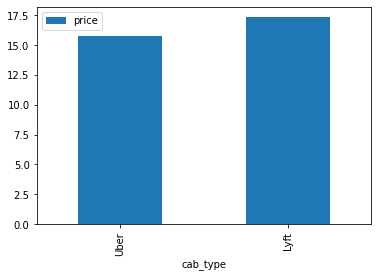

In [183]:
df_clean.groupby('cab_type')[['price']].mean().sort_values('price').plot(kind='bar')

In [184]:
df_clean.groupby('name')[['price']].mean().reset_index()

,name,price
0,Black,20.524
1,Black SUV,30.287
2,Lux,17.771
3,Lux Black,23.062
4,Lux Black XL,32.324
5,Lyft,9.611
6,Lyft XL,15.309
7,Shared,6.030
8,UberPool,8.753
9,UberX,9.765


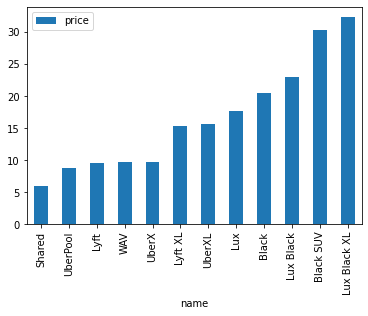

In [185]:
df_clean.groupby('name')[['price']].mean().sort_values('price').plot(kind='bar')

In [186]:
df_lyft = df_clean[
    (df_clean['cab_type'] == 'Lyft') 
].groupby(['cab_type', 'name'])['price'].mean().sort_values(ascending=False).reset_index()
df_lyft

,cab_type,name,price
0,Lyft,Lux Black XL,32.324
1,Lyft,Lux Black,23.062
2,Lyft,Lux,17.771
3,Lyft,Lyft XL,15.309
4,Lyft,Lyft,9.611
5,Lyft,Shared,6.030


In [187]:
df_uber = df_clean[
    (df_clean['cab_type'] == 'Uber') 
].groupby(['cab_type', 'name'])['price'].mean().sort_values(ascending=False).reset_index()
df_uber

,cab_type,name,price
0,Uber,Black SUV,30.287
1,Uber,Black,20.524
2,Uber,UberXL,15.678
3,Uber,UberX,9.765
4,Uber,WAV,9.765
5,Uber,UberPool,8.753


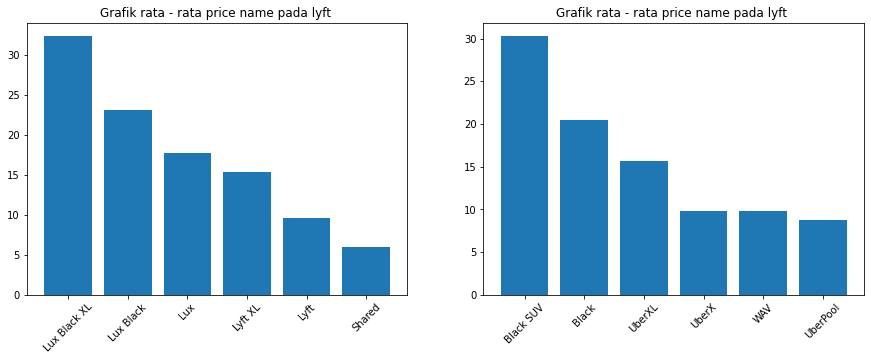

In [188]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(x=df_lyft['name'], height=df_lyft['price'])
plt.xticks(df_lyft['name'])
plt.title('Grafik rata - rata price name pada lyft ')
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
plt.bar(x=df_uber['name'], height=df_uber['price'])
plt.xticks(df_uber['name'])
plt.title('Grafik rata - rata price name pada lyft ')
plt.xticks(rotation = 45)
plt.show()

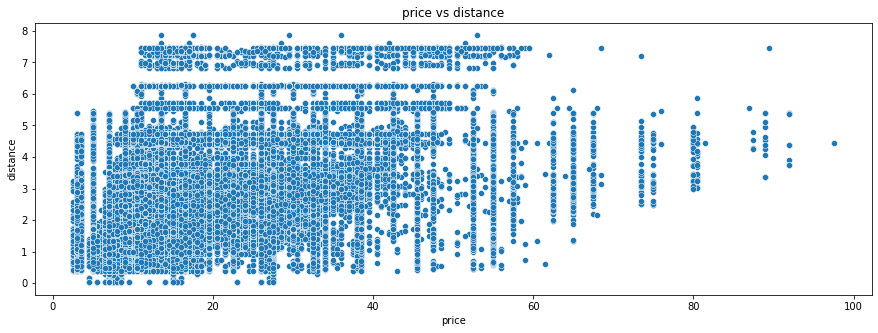

In [189]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='price', y='distance', data=df_clean)
plt.title('price vs distance')
plt.show()

> Pada bagian Exploratory Data Analysis (EDA) - Analysis dilakukan beberapa eksplorasi data, salah satunya mengquery kolom cab_type dengan price, sehingga diproleh informasi bahwa rata - rata price lyft lebih banyak dari pada rata - rata price uber

> pada Exploratory Data Analysis (EDA) - Analysis dilakukan query antara kolom name dengan kolom price, yang mana dari hasil query diperoleh informasi bahwa name Lux Black XL merupakan name yang memiliki rata - rata price tertinggi di bandingkan dengan yang lainnya

> Selain itu kita juga bisa melihat rata - rata price pada name di tiap cab typenya dan juga bisa melihat scaterplot antara price dengan distance

# **6. Splitting** 

In [190]:
# define inference
df_inf = df_clean.sample(5,random_state=0)
df_inf

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
677566,12,28,11,South Station,North Station,Uber,Black,19.500,2.380,1.000,36.530,32.060,Mostly Cloudy,0.000,0.000,0.710,5.420,6.950,9.974,42.610,37.640,36.600,32.230,partly-cloudy-day,28.140,991.360,261,0.540,0,347.500,0.720,0.000,33.830,42.610,30.130,36.600
308691,9,1,12,West End,Haymarket Square,Uber,UberXL,10.500,0.720,1.000,31.870,27.830,Mostly Cloudy,0.000,0.000,0.820,4.090,4.090,9.687,44.820,34.570,44.150,35.220,partly-cloudy-night,26.990,1019.900,312,0.520,0,282.900,0.820,0.000,31.110,44.820,27.800,44.150
396241,9,29,11,Boston University,Theatre District,Lyft,Shared,5.000,2.960,1.000,37.790,30.620,Mostly Cloudy,0.000,0.000,0.670,10.630,11.400,10.000,45.030,28.900,38.530,26.200,partly-cloudy-night,27.630,1001.970,306,0.530,0,341.900,0.750,0.000,34.670,45.030,30.300,38.530
136589,21,3,12,South Station,Back Bay,Lyft,Lux,16.500,2.100,1.000,50.430,50.430,Partly Cloudy,0.000,0.000,0.500,7.210,10.330,9.972,57.270,33.630,56.600,27.990,partly-cloudy-night,32.420,1000.650,284,0.330,0,317.900,0.890,0.001,42.830,57.270,39.510,56.600
198998,14,18,12,Financial District,Northeastern University,Lyft,Lux Black XL,38.500,2.820,1.000,26.470,14.770,Mostly Cloudy,0.000,0.000,0.460,14.360,25.170,10.000,32.910,20.900,22.870,14.270,partly-cloudy-day,8.680,1009.850,315,0.550,1,375.900,0.370,0.003,23.050,37.960,11.830,31.850


In [191]:
df_clean = df_clean.drop(df_inf.index)
df_clean

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.000,0.440,1.000,42.340,37.120,Mostly Cloudy,0.000,0.000,0.680,8.660,9.170,10.000,43.680,34.190,37.950,27.390,partly-cloudy-night,32.700,1021.980,57,0.720,0,303.800,0.300,0.128,39.890,43.680,33.730,38.070
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.000,0.440,1.000,43.580,37.350,Rain,0.130,1.000,0.940,11.980,11.980,4.786,47.300,42.100,43.920,36.200,rain,41.830,1003.970,90,1.000,0,291.100,0.640,0.130,40.490,47.300,36.200,43.920
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.000,0.440,1.000,38.330,32.930,Clear,0.000,0.000,0.750,7.330,7.330,10.000,47.550,33.100,44.120,29.110,clear-night,31.100,992.280,240,0.030,0,315.700,0.680,0.106,35.360,47.550,31.040,44.120
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.000,0.440,1.000,34.380,29.630,Clear,0.000,0.000,0.730,5.280,5.280,10.000,45.030,28.900,38.530,26.200,clear-night,26.640,1013.730,310,0.000,0,291.100,0.750,0.000,34.670,45.030,30.300,38.530
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.000,0.440,1.000,37.440,30.880,Partly Cloudy,0.000,0.000,0.700,9.140,9.140,10.000,42.180,36.710,35.750,30.290,partly-cloudy-night,28.610,998.360,303,0.440,0,347.700,0.720,0.000,33.100,42.180,29.110,35.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,West End,North End,Uber,WAV,9.500,1.000,1.000,37.050,37.050,Partly Cloudy,0.000,0.000,0.740,2.340,2.870,9.785,44.760,34.830,44.090,35.480,partly-cloudy-night,29.650,1023.570,133,0.310,0,271.500,0.820,0.000,31.420,44.760,27.770,44.090
693066,23,1,12,West End,North End,Uber,UberXL,13.000,1.000,1.000,37.050,37.050,Partly Cloudy,0.000,0.000,0.740,2.340,2.870,9.785,44.760,34.830,44.090,35.480,partly-cloudy-night,29.650,1023.570,133,0.310,0,271.500,0.820,0.000,31.420,44.760,27.770,44.090
693067,23,1,12,West End,North End,Uber,UberX,9.500,1.000,1.000,37.050,37.050,Partly Cloudy,0.000,0.000,0.740,2.340,2.870,9.785,44.760,34.830,44.090,35.480,partly-cloudy-night,29.650,1023.570,133,0.310,0,271.500,0.820,0.000,31.420,44.760,27.770,44.090
693069,23,1,12,West End,North End,Uber,Black SUV,27.000,1.000,1.000,37.050,37.050,Partly Cloudy,0.000,0.000,0.740,2.340,2.870,9.785,44.760,34.830,44.090,35.480,partly-cloudy-night,29.650,1023.570,133,0.310,0,271.500,0.820,0.000,31.420,44.760,27.770,44.090


In [192]:
df_clean.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)
df_inf

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,12,28,11,South Station,North Station,Uber,Black,19.500,2.380,1.000,36.530,32.060,Mostly Cloudy,0.000,0.000,0.710,5.420,6.950,9.974,42.610,37.640,36.600,32.230,partly-cloudy-day,28.140,991.360,261,0.540,0,347.500,0.720,0.000,33.830,42.610,30.130,36.600
1,9,1,12,West End,Haymarket Square,Uber,UberXL,10.500,0.720,1.000,31.870,27.830,Mostly Cloudy,0.000,0.000,0.820,4.090,4.090,9.687,44.820,34.570,44.150,35.220,partly-cloudy-night,26.990,1019.900,312,0.520,0,282.900,0.820,0.000,31.110,44.820,27.800,44.150
2,9,29,11,Boston University,Theatre District,Lyft,Shared,5.000,2.960,1.000,37.790,30.620,Mostly Cloudy,0.000,0.000,0.670,10.630,11.400,10.000,45.030,28.900,38.530,26.200,partly-cloudy-night,27.630,1001.970,306,0.530,0,341.900,0.750,0.000,34.670,45.030,30.300,38.530
3,21,3,12,South Station,Back Bay,Lyft,Lux,16.500,2.100,1.000,50.430,50.430,Partly Cloudy,0.000,0.000,0.500,7.210,10.330,9.972,57.270,33.630,56.600,27.990,partly-cloudy-night,32.420,1000.650,284,0.330,0,317.900,0.890,0.001,42.830,57.270,39.510,56.600
4,14,18,12,Financial District,Northeastern University,Lyft,Lux Black XL,38.500,2.820,1.000,26.470,14.770,Mostly Cloudy,0.000,0.000,0.460,14.360,25.170,10.000,32.910,20.900,22.870,14.270,partly-cloudy-day,8.680,1009.850,315,0.550,1,375.900,0.370,0.003,23.050,37.960,11.830,31.850


In [193]:
# define feature and target
X = df_clean.drop('price', axis=1)
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [194]:
# for EDA model creation we will use dataframe stored in df_eda
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(446579, 35)
(191392, 35)
(446579,)
(191392,)


In [195]:
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(446579, 36)

> Pada bagian spliting dilakukan pembagian data yang akan digunakan dalam analisa, yang mana pada analisa kali ini dataset dibagi menjadi 3 data, yaitu data inference yang nantinya digunakan untuk model inference atau data yang nanti digunakan untuk melakukan prediksi

> Ada data feature yang di simbolkan dengan X, yang mana data feature ini dibagi menjadi data training dan data testing

> Yang terahir yaitu data target atau data y, sama seperti data feature, data target juga dibagi menjadi dua, yaitu data training dan data testing

# **7. Exploratory Data Analysis (EDA) - Modeling** 

In [196]:
df_eda.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
222304,16,17,12,South Station,Beacon Hill,Uber,UberPool,2.580,1.000,37.620,32.770,Overcast,0.000,0.000,0.880,6.220,7.240,8.540,41.440,24.050,36.090,12.300,cloudy,34.530,1001.670,309,1.000,1,327.000,0.330,0.022,34.220,41.440,28.610,36.090,8.000
525873,7,15,12,Fenway,Financial District,Lyft,Lux,4.270,1.000,46.660,44.160,Mostly Cloudy,0.000,0.000,0.910,5.210,7.940,10.000,54.400,39.220,53.730,35.320,partly-cloudy-night,44.190,1022.090,226,0.870,0,297.500,0.270,0.007,39.780,54.400,36.640,53.730,26.000
390999,11,28,11,Theatre District,Boston University,Uber,Black,2.620,1.000,35.540,30.980,Mostly Cloudy,0.000,0.000,0.730,5.310,7.200,9.933,42.610,37.600,36.570,32.120,partly-cloudy-night,27.870,991.070,270,0.760,0,345.800,0.720,0.000,33.850,42.610,30.030,36.570,19.500
84005,6,13,12,Beacon Hill,Boston University,Uber,UberXL,2.330,1.000,19.280,13.960,Clear,0.000,0.000,0.570,3.600,3.600,9.868,33.920,27.050,32.950,24.470,clear-night,6.460,1028.560,345,0.040,0,325.900,0.210,0.000,18.050,33.920,13.600,32.950,15.000
597211,11,14,12,Haymarket Square,Back Bay,Lyft,Lux Black XL,3.050,1.000,27.830,27.830,Partly Cloudy,0.000,0.000,0.800,2.900,4.060,9.666,46.630,40.780,43.840,38.590,partly-cloudy-night,22.450,1034.020,194,0.290,0,293.100,0.240,0.000,27.210,46.630,24.550,43.840,38.500


In [197]:
# get name columns for data type numeric and categoric
num_col = df_eda.select_dtypes(exclude=['object']).columns.tolist()
cat_col = df_eda.select_dtypes(include=['object']).columns.tolist()

## **7.1. Numeric Feature** 

In [198]:
df_eda[num_col].head()

,hour,day,month,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
222304,16,17,12,2.580,1.000,37.620,32.770,0.000,0.000,0.880,6.220,7.240,8.540,41.440,24.050,36.090,12.300,34.530,1001.670,309,1.000,1,327.000,0.330,0.022,34.220,41.440,28.610,36.090,8.000
525873,7,15,12,4.270,1.000,46.660,44.160,0.000,0.000,0.910,5.210,7.940,10.000,54.400,39.220,53.730,35.320,44.190,1022.090,226,0.870,0,297.500,0.270,0.007,39.780,54.400,36.640,53.730,26.000
390999,11,28,11,2.620,1.000,35.540,30.980,0.000,0.000,0.730,5.310,7.200,9.933,42.610,37.600,36.570,32.120,27.870,991.070,270,0.760,0,345.800,0.720,0.000,33.850,42.610,30.030,36.570,19.500
84005,6,13,12,2.330,1.000,19.280,13.960,0.000,0.000,0.570,3.600,3.600,9.868,33.920,27.050,32.950,24.470,6.460,1028.560,345,0.040,0,325.900,0.210,0.000,18.050,33.920,13.600,32.950,15.000
597211,11,14,12,3.050,1.000,27.830,27.830,0.000,0.000,0.800,2.900,4.060,9.666,46.630,40.780,43.840,38.590,22.450,1034.020,194,0.290,0,293.100,0.240,0.000,27.210,46.630,24.550,43.840,38.500


In [199]:
df_eda[num_col].shape

(446579, 30)

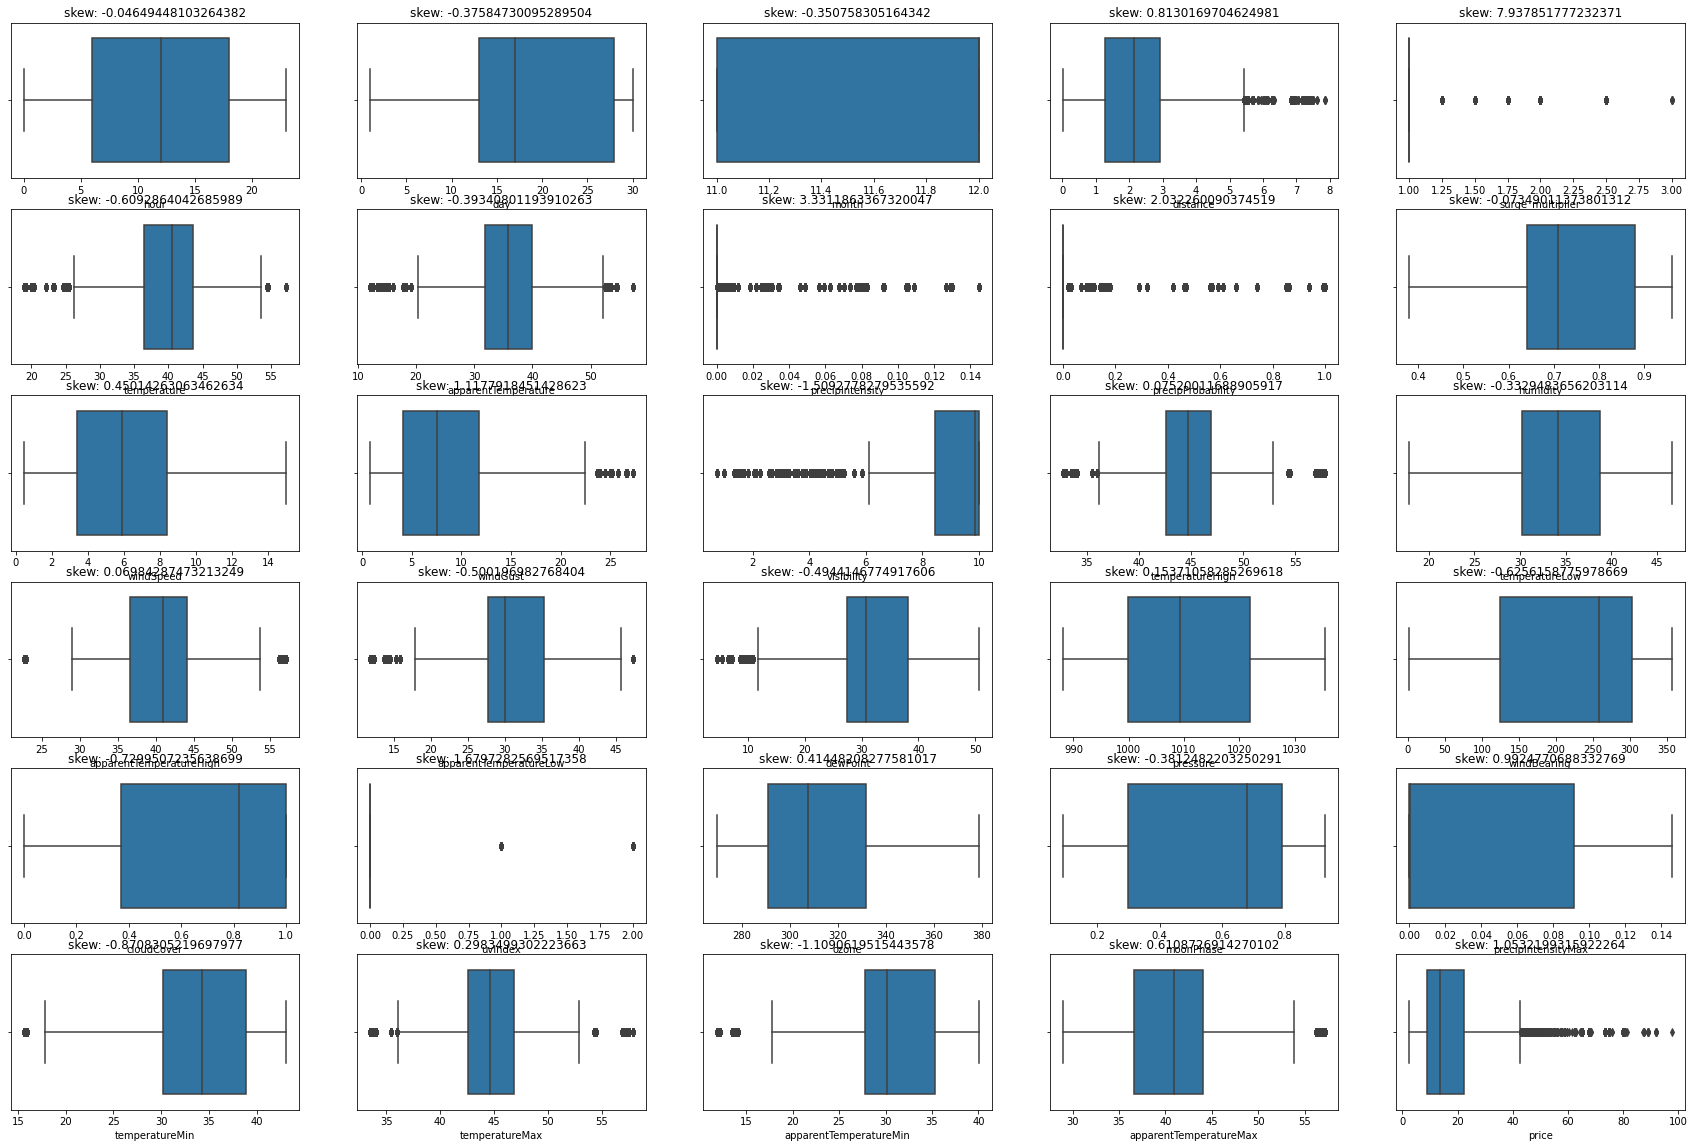

In [200]:
cols_name = ['hour', 'day', 'month', 'distance', 'surge_multiplier', 'temperature', 
            'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
            'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 
            'apparentTemperatureLow', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 
            'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax',
            'apparentTemperatureMin', 'apparentTemperatureMax', 'price']

fig, ax = plt.subplots(ncols=5,nrows=6, figsize=[30,20])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.boxplot(df_eda[col], ax=ax[idx])
    ax[idx].set_title(f'skew: {df_eda[col].skew()}')

plt.show()

> Berdasarkan grafik diatas diperoleh informasi bahwa pada kolom dataset numerik yang terdapat di data train, terdapat beberapa kolom yang memiliki outlier hal ini bisa diliat dari boxplot yang terbentuk, tertadapt data pencilan pada boxplot

> kita ambil contoh pada kolom data distance, terdapat outlier berdasarkan secara visualisasi, oleh sebab itu kita akan melakukan deteksi outlier berdasarkan distribusi dari data, karna kolom distance memiliki distribusi yang tidak normal atau skew, maka deteksi outlier menggunakan IQR

In [201]:
# outlier detection using IQR 
Q3 = df_eda['distance'].quantile(.75)
Q1 = df_eda['distance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['distance'] > upper) | (df_eda['distance'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

count of outlier:  4603
percentage of outlier:  1.0307246870094653 %


> Dari hasil deteksi dengan menggunakan IQR, pada kolom distance terdapat outlier sebanyak 4603 data atau sebnayak 1,03%

In [202]:
outlier.shape

(4603, 36)

In [203]:
# outlier detection using Z score 

upper = df_eda['apparentTemperature'].mean() + 3*df_eda['apparentTemperature'].std()
lower = df_eda['apparentTemperature'].mean() - 3*df_eda['apparentTemperature'].std()

outlier = df_eda[(df_eda['apparentTemperature'] > upper) | (df_eda['apparentTemperature'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

count of outlier:  1179
percentage of outlier:  0.26400704018773835 %


> Selain dengan menggunakan IQR untuk mendeteksi outlier, kita juga bisa menggunakan Z Score untuk mendeteksi outlier, asalkan distribusi datanya normal

In [204]:
outlier.shape

(1179, 36)

In [205]:
df_eda_num = df_eda[num_col]

In [206]:
def outlier_analysis(df_eda_num,col):
  skewness = df_eda_num[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_eda_num[col].mean() + 3*df_eda_num[col].std()
    lower = df_eda_num[col].mean() - 3*df_eda_num[col].std()
  else:
    Q1 = df_eda_num[col].quantile(0.25)
    Q3 = df_eda_num[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
  
  outliers = df_eda_num[(df_eda_num[col]<lower) | (df_eda_num[col]>upper)]

  return outliers, upper, lower

cols_name = ['hour', 'day', 'month', 'distance', 'surge_multiplier', 'temperature', 
            'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
            'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 
            'apparentTemperatureLow', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 
            'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax',
            'apparentTemperatureMin', 'apparentTemperatureMax', 'price']

for i in cols_name:
    outlier,upper, lower = outlier_analysis(df_eda_num,i)
    print(i)
    print('count of outlier: ', outlier.shape[0])
    print('percentage of outlier: ', outlier.shape[0]/df_eda_num.shape[0] * 100, '%')
    print('-'*10)

hour
count of outlier:  0
percentage of outlier:  0.0 %
----------
day
count of outlier:  0
percentage of outlier:  0.0 %
----------
month
count of outlier:  0
percentage of outlier:  0.0 %
----------
distance
count of outlier:  4603
percentage of outlier:  1.0307246870094653 %
----------
surge_multiplier
count of outlier:  14675
percentage of outlier:  3.286092718197676 %
----------
temperature
count of outlier:  23526
percentage of outlier:  5.268048878249985 %
----------
apparentTemperature
count of outlier:  1179
percentage of outlier:  0.26400704018773835 %
----------
precipIntensity
count of outlier:  97029
percentage of outlier:  21.727174811175626 %
----------
precipProbability
count of outlier:  97029
percentage of outlier:  21.727174811175626 %
----------
humidity
count of outlier:  0
percentage of outlier:  0.0 %
----------
windSpeed
count of outlier:  0
percentage of outlier:  0.0 %
----------
windGust
count of outlier:  10860
percentage of outlier:  2.431820573739473 %
---

In [207]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['distance','surge_multiplier','temperature','apparentTemperature','precipIntensity','precipProbability','windGust','visibility','apparentTemperatureLow','uvIndex','temperatureMin','apparentTemperatureMin','apparentTemperatureMax','apparentTemperatureMax'])

df_eda_cleaned = wins.fit_transform(df_eda)

In [208]:
# Compare before and after outlier handling
print('before handling: \n', df_eda.describe())

before handling: 
             hour        day      month   distance  surge_multiplier  \
count 446579.000 446579.000 446579.000 446579.000        446579.000   
mean      11.625     17.798     11.586      2.189             1.015   
std        6.949      9.986      0.492      1.134             0.095   
min        0.000      1.000     11.000      0.020             1.000   
25%        6.000     13.000     11.000      1.270             1.000   
50%       12.000     17.000     12.000      2.160             1.000   
75%       18.000     28.000     12.000      2.930             1.000   
max       23.000     30.000     12.000      7.860             3.000   

       temperature  apparentTemperature  precipIntensity  precipProbability  \
count   446579.000           446579.000       446579.000         446579.000   
mean        39.581               35.877            0.009              0.146   
std          6.719                7.908            0.027              0.329   
min         18.910       

In [209]:
print('after handling: \n', df_eda_cleaned.describe())

after handling: 
             hour        day      month   distance  surge_multiplier  \
count 446579.000 446579.000 446579.000 446579.000        446579.000   
mean      11.625     17.798     11.586      2.189             1.000   
std        6.949      9.986      0.492      1.134             0.000   
min        0.000      1.000     11.000      0.020             1.000   
25%        6.000     13.000     11.000      1.270             1.000   
50%       12.000     17.000     12.000      2.160             1.000   
75%       18.000     28.000     12.000      2.930             1.000   
max       23.000     30.000     12.000      7.860             1.000   

       temperature  apparentTemperature  precipIntensity  precipProbability  \
count   446579.000           446579.000       446579.000         446579.000   
mean        39.581               35.877            0.000              0.000   
std          6.719                7.908            0.000              0.000   
min         18.910        

> Proses diatas merupakan proses handling outlier pada pada kolom data numerik yang terdapat outlier didalamnya, sehingga berguna untuk menghandling outlier pada data selanjutnya

In [210]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']
df_temp = df_eda_cleaned[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
222304,37.620,32.770,41.440,24.050,36.090,12.300,34.220,41.440,28.610,36.090,8.000
525873,46.660,44.160,54.400,39.220,53.730,35.320,39.780,54.400,36.640,53.730,26.000
390999,35.540,30.980,42.610,37.600,36.570,32.120,33.850,42.610,30.030,36.570,19.500
84005,19.280,13.960,33.920,27.050,32.950,24.470,18.050,33.920,13.600,32.950,15.000
597211,27.830,27.830,46.630,40.780,43.840,38.590,27.210,46.630,24.550,43.840,38.500


In [211]:
climate_cols = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax','price']
df_clim = df_eda_cleaned[climate_cols]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
222304,0.000,0.000,0.880,6.220,7.240,8.540,34.530,1001.670,309,1.000,0.000,327.000,0.330,0.022,8.000
525873,0.000,0.000,0.910,5.210,7.940,10.000,44.190,1022.090,226,0.870,0.000,297.500,0.270,0.007,26.000
390999,0.000,0.000,0.730,5.310,7.200,9.933,27.870,991.070,270,0.760,0.000,345.800,0.720,0.000,19.500
84005,0.000,0.000,0.570,3.600,3.600,9.868,6.460,1028.560,345,0.040,0.000,325.900,0.210,0.000,15.000
597211,0.000,0.000,0.800,2.900,4.060,9.666,22.450,1034.020,194,0.290,0.000,293.100,0.240,0.000,38.500


In [212]:
num_cols = ['hour', 'day', 'month', 'distance', 'surge_multiplier','price']
df_num = df_eda_cleaned[num_cols]
df_num.head()

,hour,day,month,distance,surge_multiplier,price
222304,16,17,12,2.580,1.000,8.000
525873,7,15,12,4.270,1.000,26.000
390999,11,28,11,2.620,1.000,19.500
84005,6,13,12,2.330,1.000,15.000
597211,11,14,12,3.050,1.000,38.500


## **7.2. Categorical Feature** 

In [213]:
# save in df_cat process as temporary variable
df_cat = df_eda_cleaned[cat_col + ['price']]

df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
222304,South Station,Beacon Hill,Uber,UberPool,Overcast,cloudy,8.000
525873,Fenway,Financial District,Lyft,Lux,Mostly Cloudy,partly-cloudy-night,26.000
390999,Theatre District,Boston University,Uber,Black,Mostly Cloudy,partly-cloudy-night,19.500
84005,Beacon Hill,Boston University,Uber,UberXL,Clear,clear-night,15.000
597211,Haymarket Square,Back Bay,Lyft,Lux Black XL,Partly Cloudy,partly-cloudy-night,38.500


In [214]:
for i in df_cat.columns.tolist():
    print(f'num of unique label in {i}: ', len(df_cat[i].unique()))

num of unique label in source:  12
num of unique label in destination:  12
num of unique label in cab_type:  2
num of unique label in name:  12
num of unique label in short_summary:  9
num of unique label in icon:  7
num of unique label in price:  143


In [215]:
for i in df_cat.columns.tolist():
    print(i, '\n')
    print(df_cat[i].value_counts())
    print('-'*30)

source 

Financial District         37901
Northeastern University    37360
Theatre District           37323
Fenway                     37273
Back Bay                   37246
South Station              37234
West End                   37169
Haymarket Square           37121
North End                  37112
Boston University          37111
Beacon Hill                36913
North Station              36816
Name: source, dtype: int64
------------------------------
destination 

Financial District         37893
Fenway                     37399
South Station              37317
Northeastern University    37311
Theatre District           37276
West End                   37252
Back Bay                   37222
Haymarket Square           37195
North End                  37084
Boston University          37062
Beacon Hill                36929
North Station              36639
Name: destination, dtype: int64
------------------------------
cab_type 

Uber    231284
Lyft    215295
Name: cab_type, dtype: 

**One Hot Encoding for `source`, `destination ` and `name`**

In [216]:
df_cat[['source', 'destination', 'name']].head(5)

,source,destination,name
222304,South Station,Beacon Hill,UberPool
525873,Fenway,Financial District,Lux
390999,Theatre District,Boston University,Black
84005,Beacon Hill,Boston University,UberXL
597211,Haymarket Square,Back Bay,Lux Black XL


In [217]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['source', 'destination', 'name']]))
cat_ohe.columns = ohe_enc.get_feature_names(['source', 'destination', 'name'])

review = pd.concat([df_cat[['source', 'destination', 'name']].reset_index(drop=True), cat_ohe], axis=1)
review

,source,destination,name,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,South Station,Beacon Hill,UberPool,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
1,Fenway,Financial District,Lux,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,Theatre District,Boston University,Black,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Beacon Hill,Boston University,UberXL,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,Haymarket Square,Back Bay,Lux Black XL,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446574,South Station,Financial District,Black,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
446575,Beacon Hill,North End,UberX,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
446576,Northeastern University,Theatre District,Lux Black,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
446577,North End,Financial District,Black SUV,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


> Proses diatas merupakan tahapan melakukan encoding pada data kategorik yang mana pada kolom source, destination dan name dilakukan encoding dengan One Hot Encoder

In [218]:
df_cat_ohe = pd.concat([df_eda_cleaned['price'].reset_index(drop=True), cat_ohe], axis=1)
df_cat_ohe

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,8.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
1,26.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,19.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,15.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,38.500,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446574,15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
446575,10.500,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
446576,22.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
446577,26.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


**Ordinal Encoder for `cab_type `, `short_summary` and `icon `**

In [219]:
for i in ['cab_type', 'short_summary', 'icon']:
    print(df_cat[i].value_counts())
    print('-'*30)

Uber    231284
Lyft    215295
Name: cab_type, dtype: int64
------------------------------
 Overcast             141010
 Mostly Cloudy         94127
 Partly Cloudy         82110
 Clear                 56366
 Light Rain            35339
 Rain                  15139
 Possible Drizzle      11988
 Foggy                  5747
 Drizzle                4753
Name: short_summary, dtype: int64
------------------------------
 cloudy                  141010
 partly-cloudy-night     101803
 partly-cloudy-day        74434
 rain                     67219
 clear-night              38956
 clear-day                17410
 fog                       5747
Name: icon, dtype: int64
------------------------------


In [220]:
type_cat = ['Uber', 'Lyft']
short_summary_cat = [' Clear ', ' Partly Cloudy ', ' Mostly Cloudy ', ' Foggy ', ' Overcast ',' Possible Drizzle ', ' Drizzle ', ' Light Rain ', ' Rain ']
icon_cat = [ ' clear-day ', ' clear-night ',' cloudy ', ' partly-cloudy-day ', ' partly-cloudy-night ', ' fog ', ' rain ']

ord_enc = OrdinalEncoder(categories=[type_cat, short_summary_cat, icon_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat[['cab_type', 'short_summary', 'icon']]))

cat_ord.columns = ['cab_type', 'short_summary', 'icon']
review = pd.concat([df_cat[['cab_type', 'short_summary', 'icon']].reset_index(drop=True), cat_ord], axis=1)

review

,cab_type,short_summary,icon,cab_type,short_summary,icon
0,Uber,Overcast,cloudy,0.000,4.000,2.000
1,Lyft,Mostly Cloudy,partly-cloudy-night,1.000,2.000,4.000
2,Uber,Mostly Cloudy,partly-cloudy-night,0.000,2.000,4.000
3,Uber,Clear,clear-night,0.000,0.000,1.000
4,Lyft,Partly Cloudy,partly-cloudy-night,1.000,1.000,4.000
...,...,...,...,...,...,...
446574,Uber,Partly Cloudy,partly-cloudy-night,0.000,1.000,4.000
446575,Uber,Clear,clear-night,0.000,0.000,1.000
446576,Lyft,Overcast,cloudy,1.000,4.000,2.000
446577,Uber,Overcast,cloudy,0.000,4.000,2.000


In [221]:
df_cat_ord = pd.concat([df_eda_cleaned['price'].reset_index(drop=True), cat_ord ], axis=1)
df_cat_ord

,price,cab_type,short_summary,icon
0,8.000,0.000,4.000,2.000
1,26.000,1.000,2.000,4.000
2,19.500,0.000,2.000,4.000
3,15.000,0.000,0.000,1.000
4,38.500,1.000,1.000,4.000
...,...,...,...,...
446574,15.000,0.000,1.000,4.000
446575,10.500,0.000,0.000,1.000
446576,22.500,1.000,4.000,2.000
446577,26.000,0.000,4.000,2.000


> Proses diatas merupakan tahapan melakukan encoding pada data kategorik yang mana pada kolom cab_type, short_summary dan icon dilakukan encoding dengan ordinal Encoder

**Feature Selection for Numerical Features Using Heatmap Correlation**

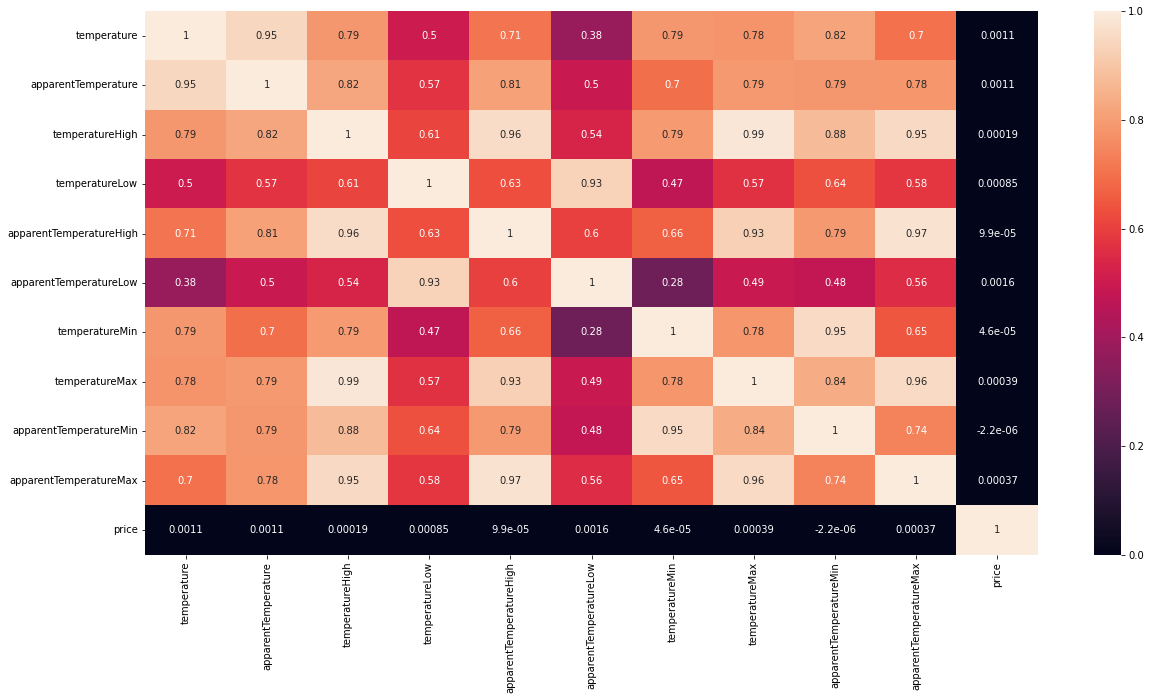

In [222]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_temp.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [223]:
df_eda_cleaned = df_eda_cleaned.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow',
                                      'apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureMax',
                                      'apparentTemperatureMin','apparentTemperatureMax'],axis=1)
df_eda_cleaned.shape

(446579, 26)

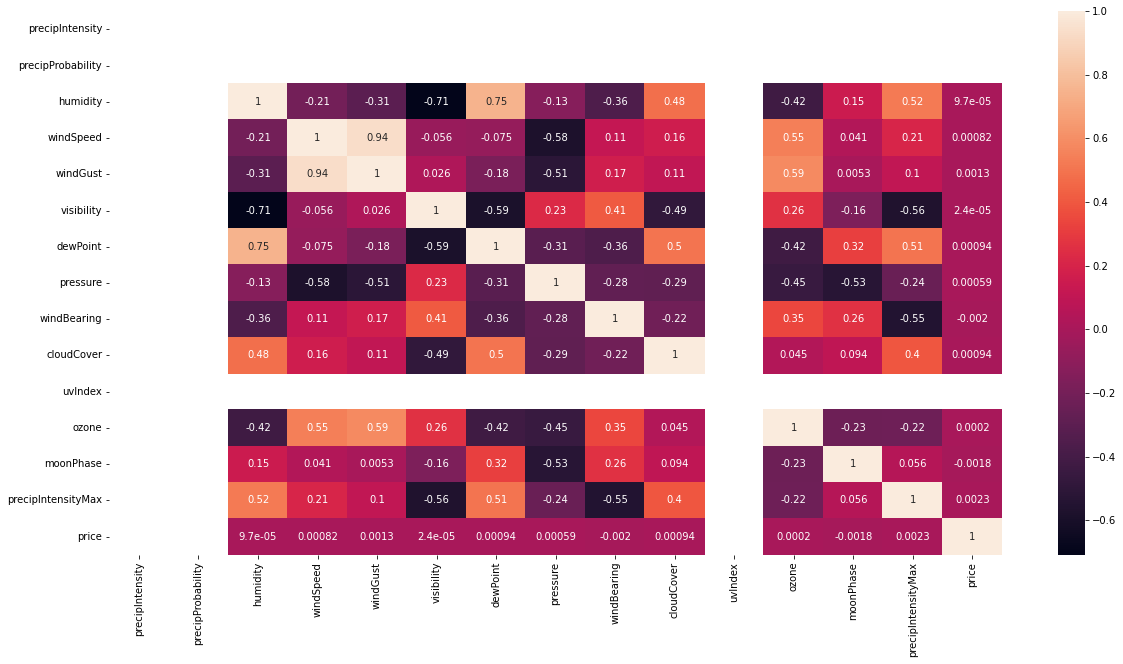

In [224]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_clim.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [225]:
df_eda_cleaned = df_eda_cleaned.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 
                                      'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing', 
                                      'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax'],axis=1)
df_eda_cleaned.shape

(446579, 12)

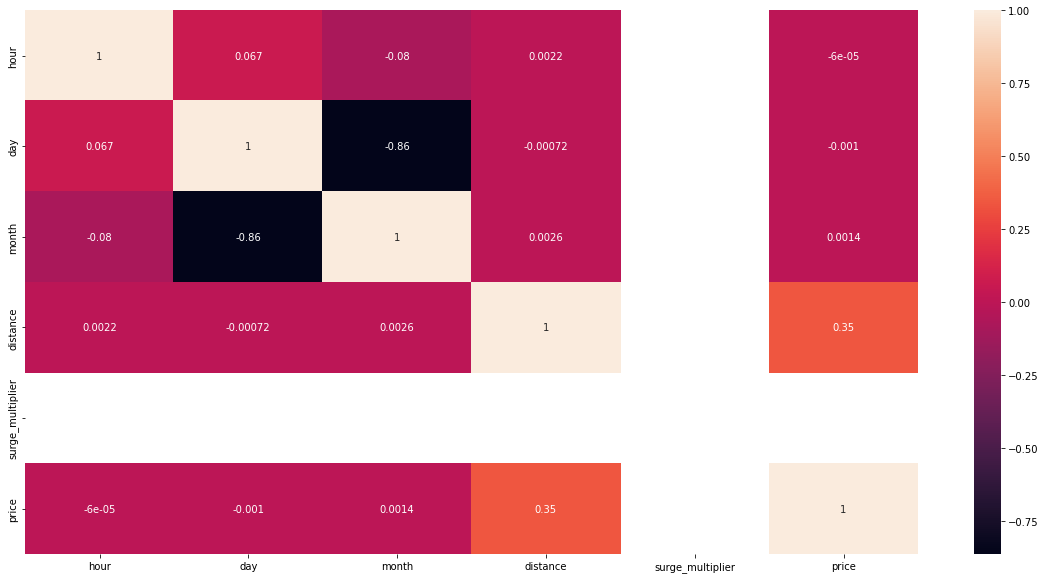

In [226]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_num.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [227]:
df_eda_cleaned = df_eda_cleaned.drop(['hour', 'day','month','surge_multiplier'],axis=1)
df_eda_cleaned.shape

(446579, 8)

In [238]:
df_eda_cleaned = df_eda_cleaned [['distance','price']]
df_eda_cleaned

,distance,price
0,2.580,8.000
1,4.270,26.000
2,2.620,19.500
3,2.330,15.000
4,3.050,38.500
...,...,...
446574,0.540,15.000
446575,1.500,10.500
446576,2.580,22.500
446577,1.040,26.000


**Feature Selection for Categorical  Features Using Heatmap Correlation**






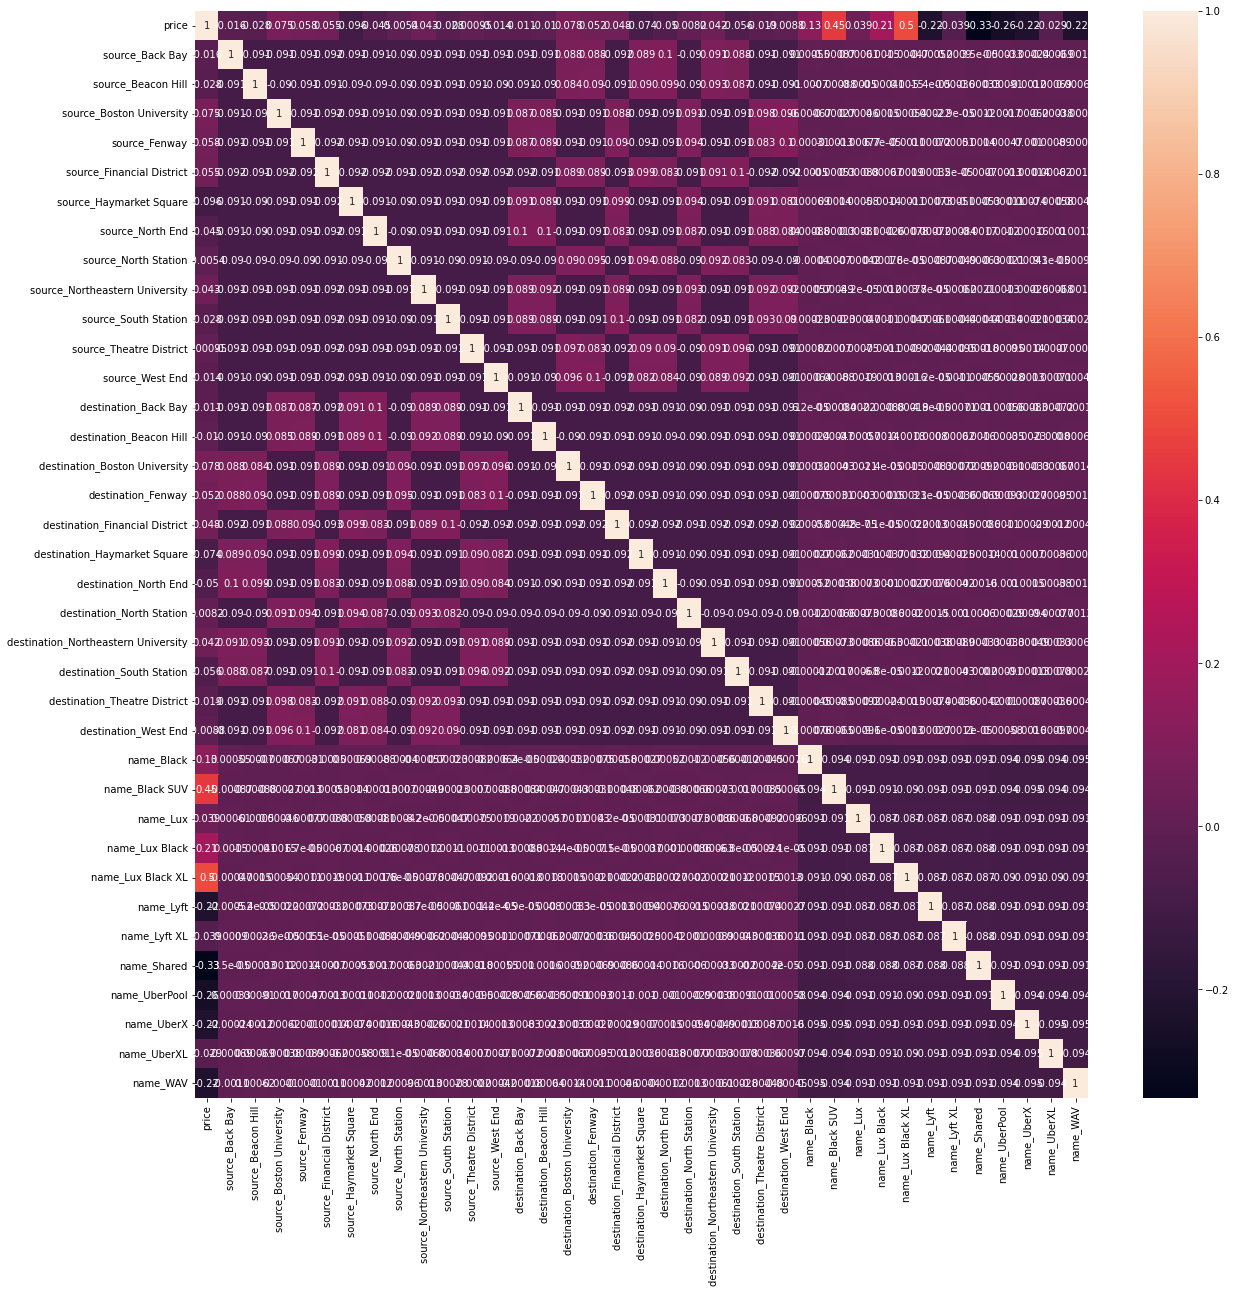

In [228]:
fig,ax = plt.subplots(figsize=[20,20])

corr = df_cat_ohe.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [229]:
corr = df_cat_ohe.corr()
corr.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
price,1.000,-0.016,-0.028,0.075,0.058,0.055,-0.096,-0.045,-0.005,0.043,-0.028,0.001,-0.014,-0.011,-0.010,0.078,0.052,0.048,-0.074,-0.050,0.008,0.042,-0.056,-0.019,-0.009,0.131,0.453,0.039,0.208,0.500,-0.220,-0.039,-0.333,-0.256,-0.224,-0.029,-0.223
source_Back Bay,-0.016,1.000,-0.091,-0.091,-0.091,-0.092,-0.091,-0.091,-0.090,-0.091,-0.091,-0.091,-0.091,-0.091,-0.091,0.088,0.088,-0.092,0.089,0.101,-0.090,0.091,0.088,-0.091,-0.091,0.001,-0.001,0.001,0.002,-0.000,-0.001,0.001,0.000,0.000,-0.000,-0.001,-0.001
source_Beacon Hill,-0.028,-0.091,1.000,-0.090,-0.091,-0.091,-0.090,-0.090,-0.090,-0.091,-0.091,-0.091,-0.090,-0.091,-0.090,0.084,0.090,-0.091,0.090,0.099,-0.090,0.093,0.087,-0.091,-0.091,-0.001,-0.001,-0.001,-0.000,0.001,-0.000,0.000,-0.000,0.001,-0.001,0.001,0.001
source_Boston University,0.075,-0.091,-0.090,1.000,-0.091,-0.092,-0.091,-0.091,-0.090,-0.091,-0.091,-0.091,-0.091,0.087,0.085,-0.091,-0.091,0.088,-0.091,-0.091,0.091,-0.091,-0.091,0.098,0.096,-0.001,-0.000,0.000,0.001,0.001,0.000,-0.000,0.001,-0.002,-0.001,-0.000,-0.000
source_Fenway,0.058,-0.091,-0.091,-0.091,1.000,-0.092,-0.091,-0.091,-0.090,-0.091,-0.091,-0.091,-0.091,0.087,0.089,-0.091,-0.091,0.090,-0.091,-0.091,0.094,-0.091,-0.091,0.083,0.103,0.000,-0.001,-0.001,0.000,-0.001,0.001,0.001,0.001,0.000,-0.001,0.001,-0.000


In [230]:
df_cat_ohe = df_cat_ohe.drop(['price', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'name_Lux', 'name_Lyft XL','name_UberXL'
       ],axis=1)
df_cat_ohe.shape

(446579, 9)

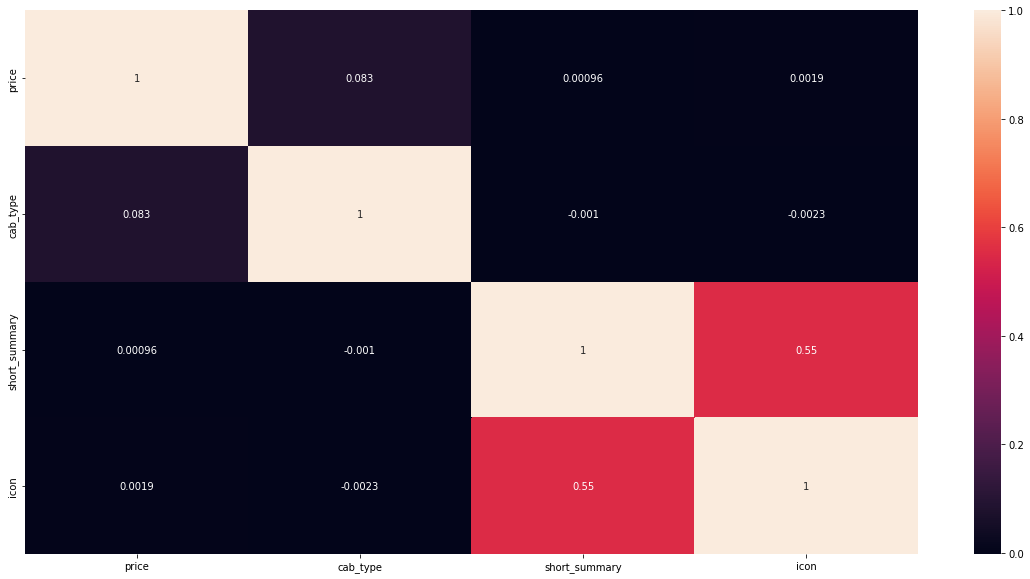

In [231]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_cat_ord.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [232]:
df_cat_ord = df_cat_ord.drop(['price','cab_type','short_summary','icon'
       ],axis=1)
df_cat_ord.shape

(446579, 0)

> Proses diatas merupakan tahapan untuk melihat hubungan antara kolom - kolom yang terdapat pada dataset dan kolom hasil encoding terhadap kolom price, yang mana nantinya kolom - kolom ini digunakan untuk penentuan modelnya

> Dari hasil correlation diatas, saya menetapkan untuk mengambil kolom yang memiliki nilai korelasi di atas 0.1, sehingga berdasarkan hasil korelasi diatas diperoleh kolom - kolom sebagai berikut: `distance, name_Black, name_Black SUV, name_Lux Black, name_Lux Black XL, name_Lyft, name_Shared, name_UberPool,name_UberX dan name_WAV`

**combine Numerical and Categorical data after processed**

In [239]:
df_eda_finish = pd.concat([df_eda_cleaned.reset_index(drop=True), df_cat_ohe], axis=1)
df_eda_finish

,distance,price,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL,name_Lyft,name_Shared,name_UberPool,name_UberX,name_WAV
0,2.580,8.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
1,4.270,26.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2.620,19.500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,2.330,15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,3.050,38.500,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
446574,0.540,15.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
446575,1.500,10.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
446576,2.580,22.500,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
446577,1.040,26.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [242]:
# numerical scaling

num_col = ['distance']
scaler = MinMaxScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(df_eda_finish[num_col]))
num_scaled.columns = num_col

df_eda_finish.drop(num_col, axis=1, inplace=True)
df_eda_finish = pd.concat([df_eda_finish, num_scaled], axis=1)

df_eda_finish = df_eda_finish[['distance', 'price', 'name_Black', 'name_Black SUV', 'name_Lux Black',
       'name_Lux Black XL', 'name_Lyft', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_WAV']]

df_eda_finish

,distance,price,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL,name_Lyft,name_Shared,name_UberPool,name_UberX,name_WAV
0,0.327,8.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
1,0.542,26.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.332,19.500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.295,15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.386,38.500,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
446574,0.066,15.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
446575,0.189,10.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
446576,0.327,22.500,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
446577,0.130,26.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


> Proses diatas merupakan tahapan untuk melalukan scaling pada kolom data numerik, dimana tujuan dari scaling ini berguna untuk membuat selisih antara data tidak terlalu jauh atau istilah lain scaling adalah untuk menormalisasikan data

# **8. Data Preprocessing** 

> Data Preprocessing merupakan tahapan untuk melalukan modeling pada data testing, langkahnya sama seperti EDA Modeling, yang membedakan hanyalnya pada data preprocessing tidak terdapat remove outlier 

In [243]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
593345,1,3,12,Boston University,North Station,Lyft,Shared,3.450,1.000,47.930,47.930,Overcast,0.000,0.000,0.950,2.700,3.620,4.315,50.990,45.040,50.320,45.690,cloudy,46.660,1002.810,299,1.000,0,288.100,0.860,0.089,36.600,50.990,35.850,50.320,7.000
284270,6,26,11,West End,Haymarket Square,Uber,UberPool,0.720,1.000,41.830,41.830,Overcast,0.000,0.000,0.920,1.830,1.830,5.589,46.600,41.850,43.970,36.510,cloudy,39.600,1014.320,110,1.000,0,309.900,0.640,0.122,40.430,46.600,37.010,43.970,7.000
295039,9,16,12,Financial District,Northeastern University,Lyft,Shared,3.420,1.000,42.340,37.120,Mostly Cloudy,0.000,0.000,0.680,8.660,9.170,10.000,43.680,34.190,37.950,27.390,partly-cloudy-night,32.700,1021.980,57,0.720,0,303.800,0.300,0.128,39.890,43.680,33.730,38.070,5.000
454047,18,28,11,Haymarket Square,Financial District,Uber,UberXL,0.990,1.000,40.920,35.130,Overcast,0.000,0.000,0.640,9.210,15.030,10.000,42.610,37.600,36.570,32.120,cloudy,29.570,991.210,296,1.000,1,353.100,0.720,0.000,33.850,42.610,30.030,36.570,11.000
88464,0,29,11,Northeastern University,West End,Lyft,Shared,2.840,1.000,39.410,33.810,Mostly Cloudy,0.000,0.000,0.690,8.110,12.210,9.996,42.720,37.590,36.750,32.250,partly-cloudy-night,30.160,996.210,294,0.810,0,352.800,0.720,0.000,33.820,42.720,30.190,36.750,7.000


In [244]:
num_target = num_col + ['price']

print(num_target)
print(cat_col)

['distance', 'price']
['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


In [245]:
# capping outlier
testing = wins.transform(testing)
testing.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
593345,1,3,12,Boston University,North Station,Lyft,Shared,3.450,1.000,47.930,47.930,Overcast,0.000,0.000,0.950,2.700,3.620,4.315,50.990,45.040,50.320,45.690,cloudy,46.660,1002.810,299,1.000,0.000,288.100,0.860,0.089,36.600,50.990,35.850,50.320,7.000
284270,6,26,11,West End,Haymarket Square,Uber,UberPool,0.720,1.000,41.830,41.830,Overcast,0.000,0.000,0.920,1.830,1.830,5.589,46.600,41.850,43.970,36.510,cloudy,39.600,1014.320,110,1.000,0.000,309.900,0.640,0.122,40.430,46.600,37.010,43.970,7.000
295039,9,16,12,Financial District,Northeastern University,Lyft,Shared,3.420,1.000,42.340,37.120,Mostly Cloudy,0.000,0.000,0.680,8.660,9.170,10.000,43.680,34.190,37.950,27.390,partly-cloudy-night,32.700,1021.980,57,0.720,0.000,303.800,0.300,0.128,39.890,43.680,33.730,38.070,5.000
454047,18,28,11,Haymarket Square,Financial District,Uber,UberXL,0.990,1.000,40.920,35.130,Overcast,0.000,0.000,0.640,9.210,15.030,10.000,42.610,37.600,36.570,32.120,cloudy,29.570,991.210,296,1.000,0.000,353.100,0.720,0.000,33.850,42.610,30.030,36.570,11.000
88464,0,29,11,Northeastern University,West End,Lyft,Shared,2.840,1.000,39.410,33.810,Mostly Cloudy,0.000,0.000,0.690,8.110,12.210,9.996,42.720,37.590,36.750,32.250,partly-cloudy-night,30.160,996.210,294,0.810,0.000,352.800,0.720,0.000,33.820,42.720,30.190,36.750,7.000


In [246]:
# OHE
cat_ohe = pd.DataFrame(ohe_enc.transform(testing[['source', 'destination', 'name']]))
cat_ohe.columns = ohe_enc.get_feature_names(['source', 'destination', 'name'])

review = pd.concat([testing[['source', 'destination', 'name']].reset_index(drop=True), cat_ohe], axis=1)
review

,source,destination,name,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,Boston University,North Station,Shared,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
1,West End,Haymarket Square,UberPool,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
2,Financial District,Northeastern University,Shared,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
3,Haymarket Square,Financial District,UberXL,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,Northeastern University,West End,Shared,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191387,Fenway,Back Bay,Black,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
191388,North Station,Haymarket Square,Lux Black,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
191389,Financial District,Northeastern University,Lux Black,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
191390,Fenway,Beacon Hill,Lyft,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000


In [250]:
# ordinal encoder
cat_ord = pd.DataFrame(ord_enc.transform(testing[['cab_type', 'short_summary', 'icon']]))

cat_ord.columns = ['cab_type', 'short_summary', 'icon']
review = pd.concat([testing[['cab_type', 'short_summary', 'icon']].reset_index(drop=True), cat_ord], axis=1)

review

,cab_type,short_summary,icon,cab_type,short_summary,icon
0,Lyft,Overcast,cloudy,1.000,4.000,2.000
1,Uber,Overcast,cloudy,0.000,4.000,2.000
2,Lyft,Mostly Cloudy,partly-cloudy-night,1.000,2.000,4.000
3,Uber,Overcast,cloudy,0.000,4.000,2.000
4,Lyft,Mostly Cloudy,partly-cloudy-night,1.000,2.000,4.000
...,...,...,...,...,...,...
191387,Uber,Overcast,cloudy,0.000,4.000,2.000
191388,Lyft,Overcast,cloudy,1.000,4.000,2.000
191389,Lyft,Mostly Cloudy,partly-cloudy-day,1.000,2.000,3.000
191390,Lyft,Partly Cloudy,partly-cloudy-night,1.000,1.000,4.000


In [255]:
testing_finish = pd.concat([testing[num_target].reset_index(drop=True), cat_ohe, cat_ord], axis=1)
testing_finish = testing_finish[['distance', 'price', 'name_Black', 'name_Black SUV', 'name_Lux Black',
       'name_Lux Black XL', 'name_Lyft', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_WAV']]
testing_finish

,distance,price,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL,name_Lyft,name_Shared,name_UberPool,name_UberX,name_WAV
0,3.450,7.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
1,0.720,7.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
2,3.420,5.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
3,0.990,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2.840,7.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
191387,1.500,16.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
191388,0.740,16.500,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
191389,3.400,27.500,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
191390,2.370,13.500,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000


In [256]:
# numerical scaling

num_col = ['distance']

num_scaled = pd.DataFrame(scaler.transform(testing_finish[num_col]))
num_scaled.columns = num_col

testing_finish.drop(num_col, axis=1, inplace=True)
testing_finish = pd.concat([testing_finish, num_scaled], axis=1)

testing_finish

,price,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL,name_Lyft,name_Shared,name_UberPool,name_UberX,name_WAV,distance
0,7.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,3.450
1,7.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.720
2,5.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,3.420
3,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.990
4,7.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,2.840
...,...,...,...,...,...,...,...,...,...,...,...
191387,16.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.500
191388,16.500,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.740
191389,27.500,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,3.400
191390,13.500,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,2.370


In [258]:
X_train = df_eda_finish.drop('price',axis=1).copy()
y_train = df_eda_finish['price']

X_test = testing_finish.drop('price',axis=1).copy()
y_test = testing_finish['price']

# **9. Modeling** 

## **9.1. Model Definition**

In [259]:
# linear regression
lin_reg = LinearRegression()

In [281]:
# lasso regression
laso = Lasso()

In [290]:
# ridge regression
rid = Ridge(alpha=0.05)

> Pada model definition merupakan penentuan model apa saja yang akan digunakan, pada analisis ini saya menggunakan 3 model, dan akan membandingkan dari ketiganya

## **9.2. Model Training**

In [262]:
# linear regression

lin_reg.fit(X_train, y_train)

LinearRegression()

In [282]:
# lasso regression

laso.fit(X_train, y_train)

Lasso()

In [291]:
# ridge regression

rid.fit(X_train, y_train)

Ridge(alpha=0.05)

## **9.3. Model Evaluation**

In [266]:
# linear regression

pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

print('mse train: ', mean_absolute_error(y_train, pred_train))
print('mse test: ', mean_absolute_error(y_test, pred_test))
print("R2 Score train:",r2_score(y_train,pred_train))
print("R2 Score test:",r2_score(y_test,pred_test))

mse train:  2.0040003798793187
mse test:  19.535792173803355
R2 Score train: 0.8896478935043102
R2 Score test: -5.1029545604884525


In [283]:
# lasso regression

pred_train_laso = laso.predict(X_train)
pred_test_laso = laso.predict(X_test)

print('mse train: ', mean_absolute_error(y_train, pred_train_laso))
print('mse test: ', mean_absolute_error(y_test, pred_test_laso))
print("R2 Score train:",r2_score(y_train,pred_train_laso))
print("R2 Score test:",r2_score(y_test,pred_test_laso))

mse train:  6.942825122701878
mse test:  7.679926194103853
R2 Score train: 0.16718300150905008
R2 Score test: -0.034151796133808476


In [298]:
# ridge regression

pred_train_ridge = rid.predict(X_train)
pred_test_ridge = rid.predict(X_test)

print('mse train: ', mean_absolute_error(y_train, pred_train_ridge))
print('mse test: ', mean_absolute_error(y_test, pred_test_ridge))
print("R2 Score train:",r2_score(y_train,pred_train_ridge))
print("R2 Score test:",r2_score(y_test,pred_test_ridge))

mse train:  2.003997731272123
mse test:  19.53575188655649
R2 Score train: 0.889647893499479
R2 Score test: -5.102932948495676


In [300]:
print("Model slope:    ", laso.coef_)
print("Model intercept:", laso.intercept_)

Model slope:     [ 0.          0.          2.6888187   0.          3.82655045 -0.
 -0.         -0.         -0.         -0.        ]
Model intercept: 15.997505810329425


> Berdasarkan hasil dari model evaluasi diatas, diketahi bahwa model lasso memiliki selisih nilai mse yang kecil, daripada model yang lainnya, sehingga dari hasil tersebut model laso merupakan model yang baik dari ketiga model.

> Akan tetapi dilihat dari R2 Score nya ketiga model tidak ada yang baik dalam melakukan prediksi, sehingga perlu di perhatikan lagi dalam pemilihan hyperparameter atau pada proses datanya

## **9.4. Model Inference**

> pada proses ini akan dilakukan prediksi dari model yang sudah dibuat dengan menggunakan data inference, sebelum data inference digunakan data terlebih dahulu harus proses seperti pada data train dan data testing, jikan sudah di proses baru data inference bisa digunakan untuk melakukan prediksi

In [269]:
df_inf

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,12,28,11,South Station,North Station,Uber,Black,19.500,2.380,1.000,36.530,32.060,Mostly Cloudy,0.000,0.000,0.710,5.420,6.950,9.974,42.610,37.640,36.600,32.230,partly-cloudy-day,28.140,991.360,261,0.540,0,347.500,0.720,0.000,33.830,42.610,30.130,36.600
1,9,1,12,West End,Haymarket Square,Uber,UberXL,10.500,0.720,1.000,31.870,27.830,Mostly Cloudy,0.000,0.000,0.820,4.090,4.090,9.687,44.820,34.570,44.150,35.220,partly-cloudy-night,26.990,1019.900,312,0.520,0,282.900,0.820,0.000,31.110,44.820,27.800,44.150
2,9,29,11,Boston University,Theatre District,Lyft,Shared,5.000,2.960,1.000,37.790,30.620,Mostly Cloudy,0.000,0.000,0.670,10.630,11.400,10.000,45.030,28.900,38.530,26.200,partly-cloudy-night,27.630,1001.970,306,0.530,0,341.900,0.750,0.000,34.670,45.030,30.300,38.530
3,21,3,12,South Station,Back Bay,Lyft,Lux,16.500,2.100,1.000,50.430,50.430,Partly Cloudy,0.000,0.000,0.500,7.210,10.330,9.972,57.270,33.630,56.600,27.990,partly-cloudy-night,32.420,1000.650,284,0.330,0,317.900,0.890,0.001,42.830,57.270,39.510,56.600
4,14,18,12,Financial District,Northeastern University,Lyft,Lux Black XL,38.500,2.820,1.000,26.470,14.770,Mostly Cloudy,0.000,0.000,0.460,14.360,25.170,10.000,32.910,20.900,22.870,14.270,partly-cloudy-day,8.680,1009.850,315,0.550,1,375.900,0.370,0.003,23.050,37.960,11.830,31.850


In [271]:
inf = wins.transform(df_inf)
inf

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,12,28,11,South Station,North Station,Uber,Black,2.380,1.000,36.530,32.060,Mostly Cloudy,0.000,0.000,0.710,5.420,6.950,9.974,42.610,37.640,36.600,32.230,partly-cloudy-day,28.140,991.360,261,0.540,0.000,347.500,0.720,0.000,33.830,42.610,30.130,36.600,19.500
1,9,1,12,West End,Haymarket Square,Uber,UberXL,0.720,1.000,31.870,27.830,Mostly Cloudy,0.000,0.000,0.820,4.090,4.090,9.687,44.820,34.570,44.150,35.220,partly-cloudy-night,26.990,1019.900,312,0.520,0.000,282.900,0.820,0.000,31.110,44.820,27.800,44.150,10.500
2,9,29,11,Boston University,Theatre District,Lyft,Shared,2.960,1.000,37.790,30.620,Mostly Cloudy,0.000,0.000,0.670,10.630,11.400,10.000,45.030,28.900,38.530,26.200,partly-cloudy-night,27.630,1001.970,306,0.530,0.000,341.900,0.750,0.000,34.670,45.030,30.300,38.530,5.000
3,21,3,12,South Station,Back Bay,Lyft,Lux,2.100,1.000,50.430,50.430,Partly Cloudy,0.000,0.000,0.500,7.210,10.330,9.972,57.270,33.630,56.600,27.990,partly-cloudy-night,32.420,1000.650,284,0.330,0.000,317.900,0.890,0.001,42.830,57.270,39.510,56.600,16.500
4,14,18,12,Financial District,Northeastern University,Lyft,Lux Black XL,2.820,1.000,26.470,14.770,Mostly Cloudy,0.000,0.000,0.460,14.360,25.170,10.000,32.910,20.900,22.870,14.270,partly-cloudy-day,8.680,1009.850,315,0.550,0.000,375.900,0.370,0.003,23.050,37.960,11.830,31.850,38.500


In [272]:
# OHE
cat_ohe = pd.DataFrame(ohe_enc.transform(inf[['source', 'destination', 'name']]))
cat_ohe.columns = ohe_enc.get_feature_names(['source', 'destination', 'name'])

review = pd.concat([inf[['source', 'destination', 'name']].reset_index(drop=True), cat_ohe], axis=1)
review

,source,destination,name,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,South Station,North Station,Black,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,West End,Haymarket Square,UberXL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,Boston University,Theatre District,Shared,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
3,South Station,Back Bay,Lux,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Financial District,Northeastern University,Lux Black XL,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [273]:
# ordinal encoder
cat_ord = pd.DataFrame(ord_enc.transform(inf[['cab_type', 'short_summary', 'icon']]))

cat_ord.columns = ['cab_type', 'short_summary', 'icon']
review = pd.concat([inf[['cab_type', 'short_summary', 'icon']].reset_index(drop=True), cat_ord], axis=1)

review

,cab_type,short_summary,icon,cab_type,short_summary,icon
0,Uber,Mostly Cloudy,partly-cloudy-day,0.000,2.000,3.000
1,Uber,Mostly Cloudy,partly-cloudy-night,0.000,2.000,4.000
2,Lyft,Mostly Cloudy,partly-cloudy-night,1.000,2.000,4.000
3,Lyft,Partly Cloudy,partly-cloudy-night,1.000,1.000,4.000
4,Lyft,Mostly Cloudy,partly-cloudy-day,1.000,2.000,3.000


In [274]:
inf_finish = pd.concat([inf[num_target].reset_index(drop=True), cat_ohe, cat_ord], axis=1)
inf_finish = inf_finish[['distance', 'price', 'name_Black', 'name_Black SUV', 'name_Lux Black',
       'name_Lux Black XL', 'name_Lyft', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_WAV']]
inf_finish

,distance,price,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL,name_Lyft,name_Shared,name_UberPool,name_UberX,name_WAV
0,2.380,19.500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.720,10.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2.960,5.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
3,2.100,16.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2.820,38.500,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000


In [275]:
# numerical scaling

num_col = ['distance']

num_scaled = pd.DataFrame(scaler.transform(inf_finish[num_col]))
num_scaled.columns = num_col

inf_finish.drop(num_col, axis=1, inplace=True)
inf_finish = pd.concat([inf_finish, num_scaled], axis=1)

inf_finish

,price,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL,name_Lyft,name_Shared,name_UberPool,name_UberX,name_WAV,distance
0,19.500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.380
1,10.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.720
2,5.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,2.960
3,16.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.100
4,38.500,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,2.820


In [294]:
X_inf = inf_finish.drop('price', axis=1).copy()

In [296]:
y_pred_inf =laso.predict(X_inf)
y_pred_inf

array([15.99750581, 15.99750581, 15.99750581, 15.99750581, 15.99750581])

> Dari hasil prediksi dengan menggunakan data inference diperoleh nilai prediksinya adalah sebagai berikut 15.99750581, 15.99750581, 15.99750581, 15.99750581, 15.99750581. Dari hasil prediksi diperoleh nilai yang sama, hal ini mungki dipengaruhi oleh coefisien dan intersep dari model yang dibuat

# **10. Questions & Conclusions** 

## **10.1. Questions** 

### 1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

> Asumsi dasar untuk model regresi linier adalah sebagai berikut: 

> 1. Linearitas, artinya data yang digunakan pada model regresi harus memiliki hubungan yang linear antara variabel terikat dengan variabel bebasnya

> 2. Normalitas, artinya pada data variabel bebas harus memiliki distribusi yang normal

> 3. tidak terdapat multikolinearitas, artinya disetiap variabel bebas tidak memiliki hubungan antara satu dengan yang lainnya

> 4. tidak memiliki outokorelasi, artinya setiap data pada variabel bebas tidak memiliki hubungan antara satu dengan yang lainnya, biasanya outokorelasi ini terdapat pada data yang time series

> 5. Homokedastisitas, artinya data tidak menyebar atau penyebaran data tejadi pada garis regresi

## 2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

In [301]:
print("Model slope:    ", laso.coef_)
print("Model intercept:", laso.intercept_)

Model slope:     [ 0.          0.          2.6888187   0.          3.82655045 -0.
 -0.         -0.         -0.         -0.        ]
Model intercept: 15.997505810329425


> Dari hasil code diatas diperoleh coefficient dan intersep dari model regresi linear yang di regularisasi dengan laso, yang mana nilai intercep ada lah sebesar 15.997505810329425, yang berarti jika melakukan prediksi dengan data yang dimasukan semuanya 0, maka nilai prediksi akan memiliki nilai 15.997505810329425 atau nilai intersepnya itu sendiri

> Dan dari hasil diatas, terdapat nilai coefficient yang hampir semua nialinya 0, sehingga berapun nilai yang dimasukan akan tidak memiliki arti apa - apa karna dikalikan dengan 0

## **10.2. Conclusions** 

> Berdasarkan hasil pembuatan model diatas,model yang didapatkan kurang baik, sehingga perlu dilakukan treatment ulang seperti melaukan perubahan pada hyperparamet model, danti model atau melalukan pengecekan ulang pada saat melalukan data preprocessing supaya mendapatkan model yang diharapkan